In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../../data/kaggle_20m/movie_genres_ratings.csv')

# Splitting features and target variable
X = df.drop(columns=['movieId', 'title', 'rating'])
y = df['rating']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
df.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.921240
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.211977
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3.151040
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,2.861393
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.064592


In [2]:
# Hyperparameters
n_neighbors = 5
weights = 'uniform'
algorithm = 'auto'
leaf_size = 30

In [3]:
# Initialize the k-NN model
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [4]:
# Predict on the test set
knn_predictions = knn_model.predict(X_test)

# Compute MSE, RMSE, and MAE
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_predictions)

print(f"k-NN MSE on Test Set: {knn_mse:.4f}")
print(f"k-NN RMSE on Test Set: {knn_rmse:.4f}")
print(f"k-NN MAE on Test Set: {knn_mae:.4f}")

k-NN MSE on Test Set: 0.4222
k-NN RMSE on Test Set: 0.6498
k-NN MAE on Test Set: 0.4847


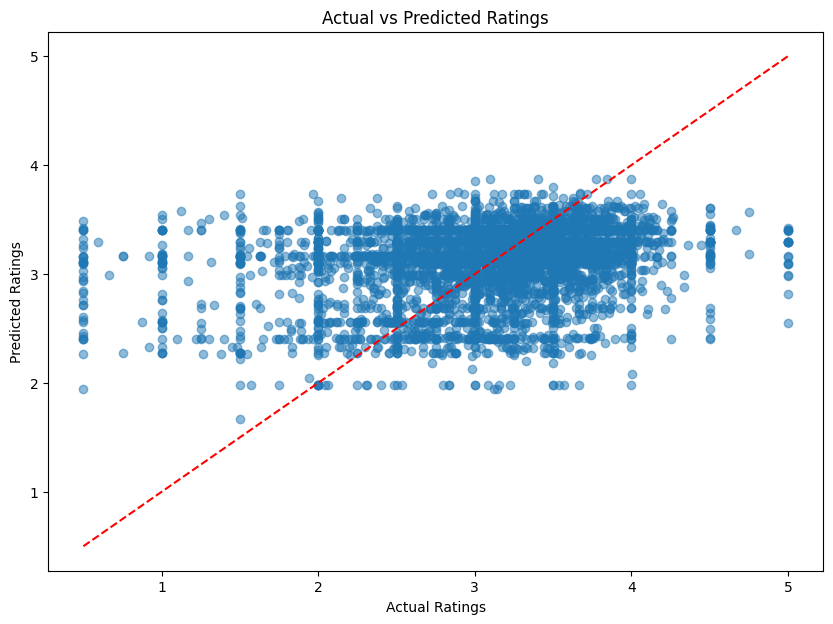

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, knn_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()


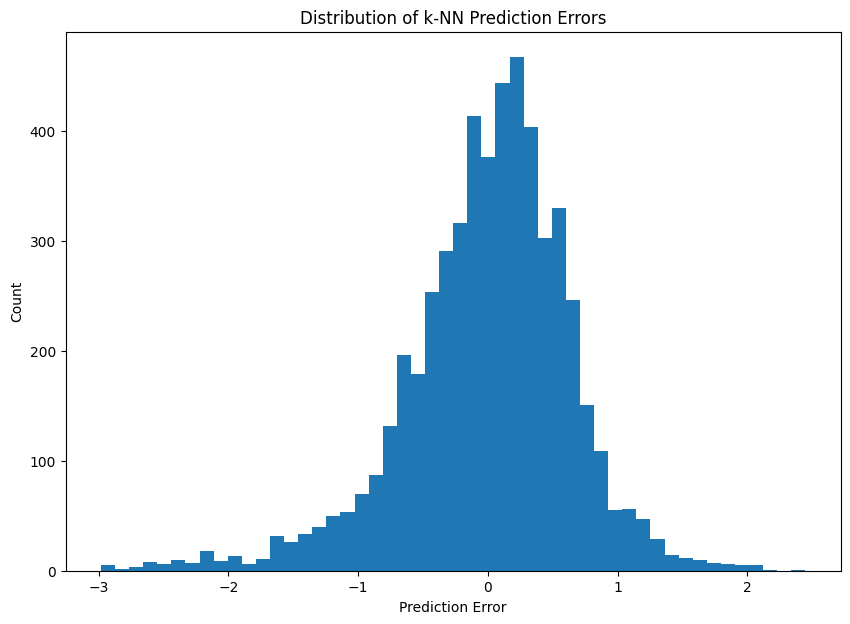

In [6]:
errors = y_test - knn_predictions
plt.figure(figsize=(10, 7))
plt.hist(errors, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.title("Distribution of k-NN Prediction Errors")
plt.show()


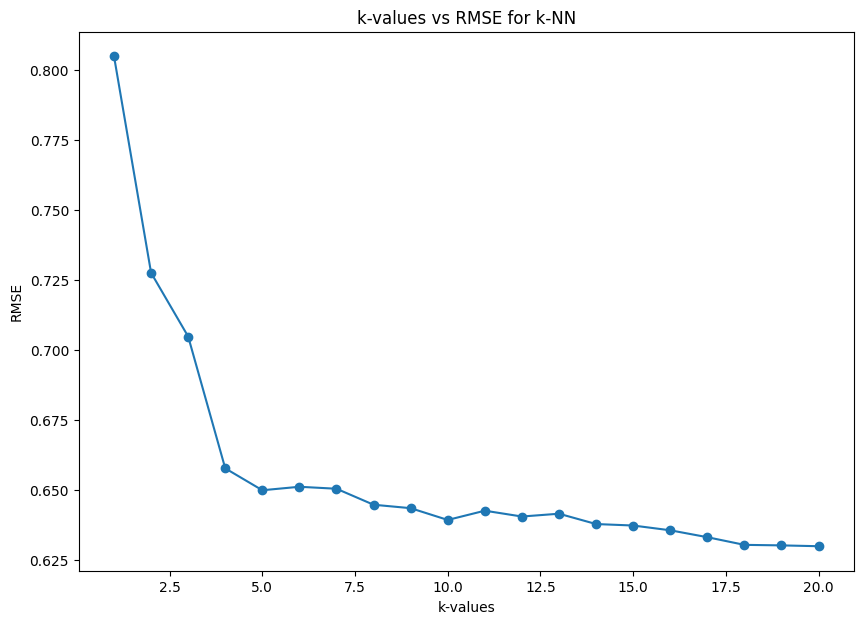

In [7]:
k_values = list(range(1, 21))
rmse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    rmse_values.append(np.sqrt(mean_squared_error(y_test, pred)))

plt.figure(figsize=(10, 7))
plt.plot(k_values, rmse_values, marker='o')
plt.xlabel("k-values")
plt.ylabel("RMSE")
plt.title("k-values vs RMSE for k-NN")
plt.show()


/home/pegos/PycharmProjects/Neural_Networks/venv/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


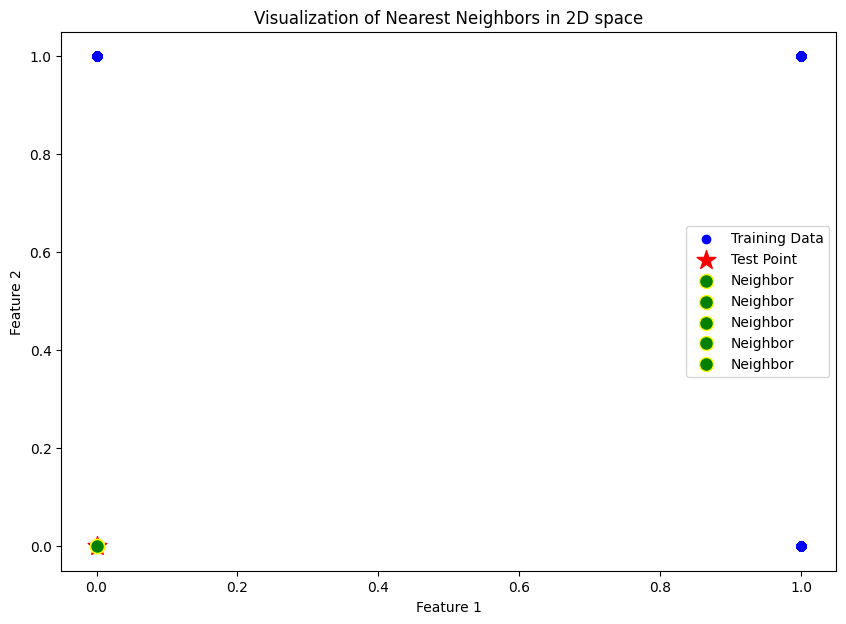

In [12]:
# Choose two features (for example, feature1 and feature2)
plt.figure(figsize=(10, 7))
plt.scatter(X_train['Drama'], X_train['Action'], c='blue', label='Training Data')

# Pick a sample point from the test set
sample_point = X_test.iloc[0]
plt.scatter(sample_point['Drama'], sample_point['Action'], c='red', marker='*', s=200, label='Test Point')

# Get neighbors for the sample point
distances, indices = knn_model.kneighbors([sample_point])
for index in indices[0]:
    plt.scatter(X_train.iloc[index]['Drama'], X_train.iloc[index]['Action'], c='green', edgecolor='yellow', s=100, label='Neighbor')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Visualization of Nearest Neighbors in 2D space")
plt.show()
